<a href="https://colab.research.google.com/github/caesar013/PCVK_GENAP_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from  google.colab import drive

# Access GDrive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Nomer 1

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


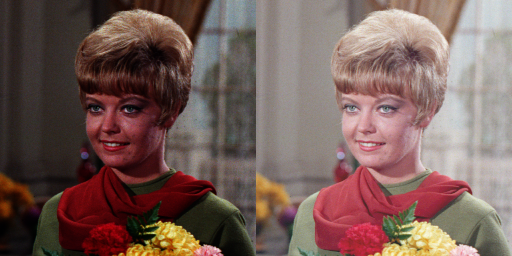

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

img_female = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/female.tiff')

# gamma_image = [[[np.clip((img_female[row,column,channel] / 255.0) ** (1/gamma) * 255.0, 0,255) for row in range(img_female.shape[0]) for column in range(img_female.shape[1]) for channel in range(img_female.shape[2])]]]

gamma_image = np.clip((img_female / 255.0) ** (1/gamma) * 255.0, 0, 255).astype(np.uint8)

# print(img_female.shape)
# print(gamma_image.shape)
cv2_imshow(cv.hconcat((img_female,gamma_image)))

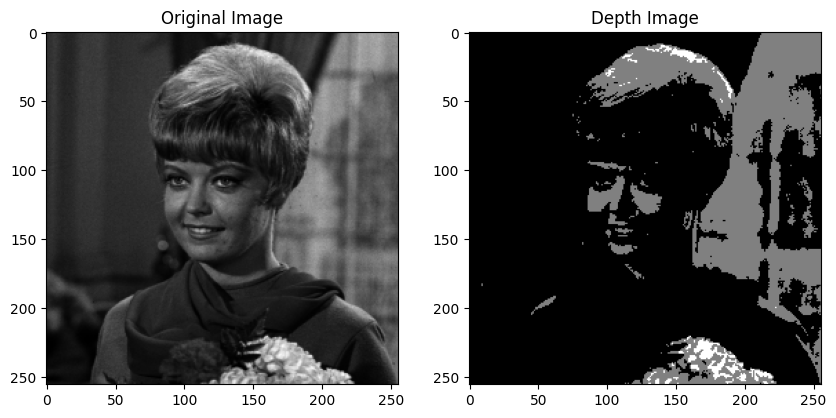

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

depth_image = (original / level).astype(np.uint8) * level

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(original, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(depth_image, cmap='gray')
axs[1].set_title('Depth Image')

plt.show()

In [ ]:
import glob

In [ ]:
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images for PCVK/noises/*'):
 cv_img.append(cv.imread(img))

def average_denoising(images):
  denoised_image = np.zeros((images[0].shape[0], images[0].shape[1], 3), dtype=np.float32)

  for img in images:
    denoised_image += img.astype(np.float32)

  denoised_image = denoised_image / len(images)

  denoised_image = denoised_image.astype(np.uint8)

  return denoised_image



In [1]:
print(12.0/3)

4.0


## Tugas Kelompok

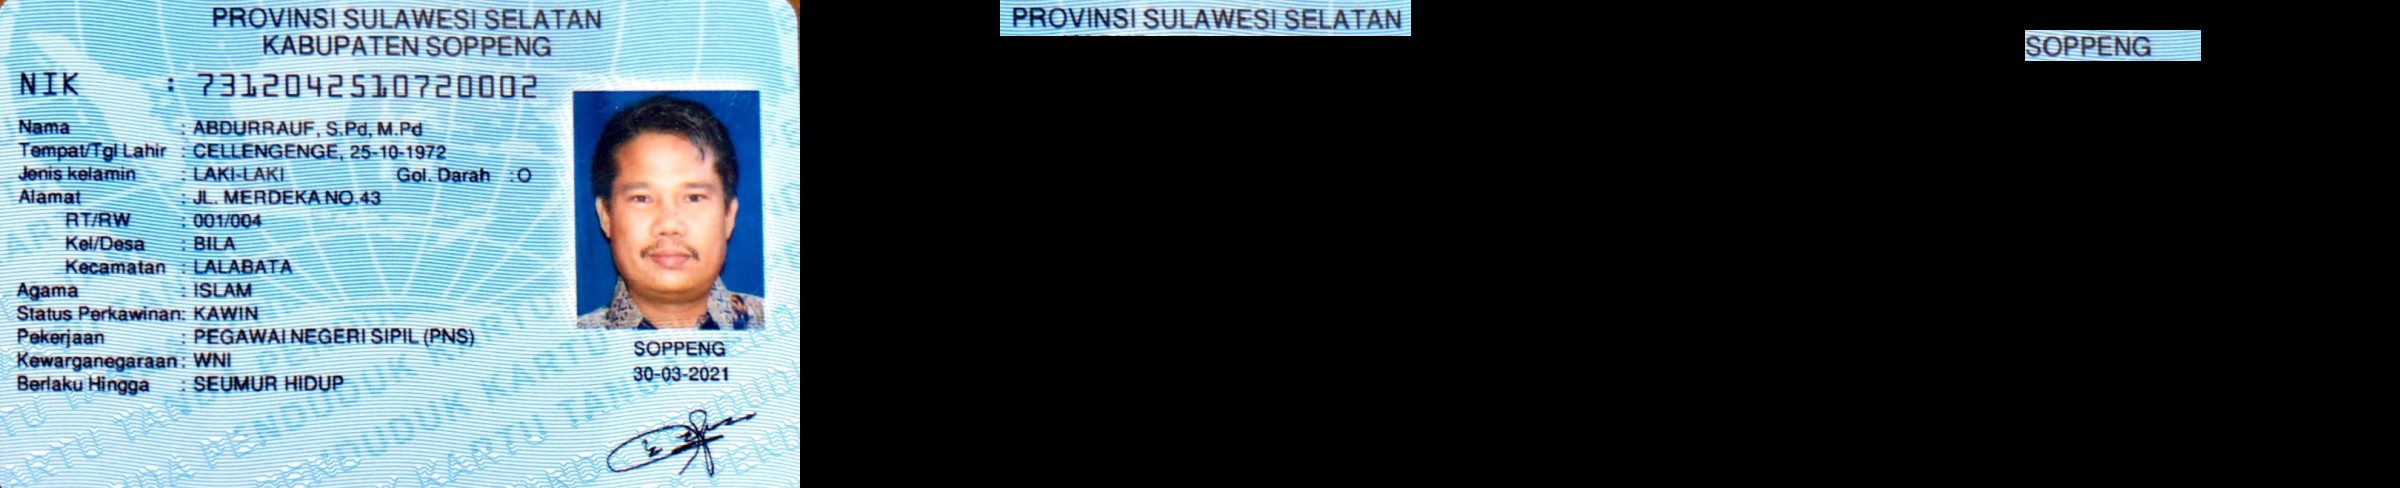

True

In [ ]:
# Membaca citra asli
img_asli = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# kotak = cv.rectangle(img_asli,(0,200), (70,600), (255,255,255), -1)
mask = np.zeros(img_asli.shape, dtype=np.uint8)
mask = cv.rectangle(mask,(200,0), (610,35), (255,255,255), -1)

mask2 = np.zeros(img_asli.shape, dtype=np.uint8)
mask2 = cv.rectangle(mask2,(425,30), (600,60), (255,255,255), -1)

result_kotak = img_asli & mask
result_kotak2 = img_asli & mask2

final_frame = cv.hconcat((img_asli, result_kotak, result_kotak2))
cv2_imshow(final_frame)

cv.imwrite('/content/drive/MyDrive/PCVK/KTP_provinsi.jpeg', result_kotak)
cv.imwrite('/content/drive/MyDrive/PCVK/KTP_kabupaten.jpeg', result_kotak2)

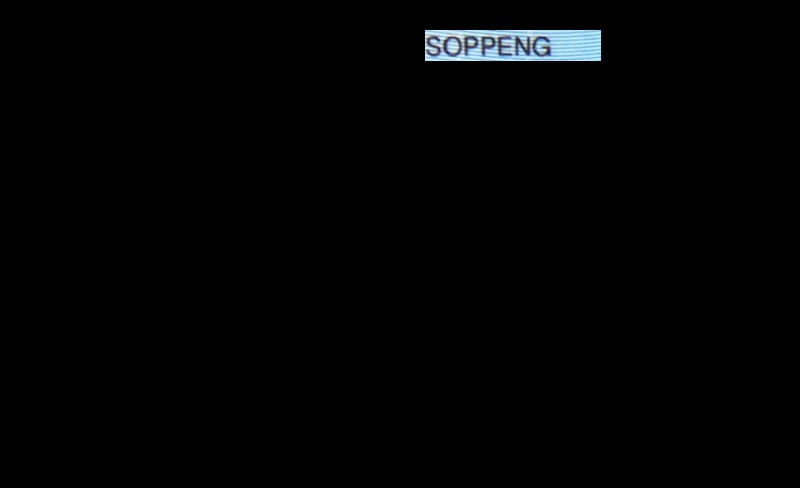

In [ ]:
cv2_imshow(cv.imread('/content/drive/MyDrive/PCVK/KTP_kabupaten.jpeg'))